In [ ]:
!apt-get update
!pip install selenium webdriver-manager flask
!pip install PyPDF2

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,380 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,679 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jamm

In [ ]:
!pip install requests beautifulsoup4

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

# Configuración más detallada de las opciones de Chrome
chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument('--disable-gpu')

# Configurar la ruta del driver
service = Service('/usr/bin/chromedriver')

#Precio del juego con el sitio donde comprar


In [ ]:
import pandas as pd

# Iniciar driver
driver = webdriver.Chrome(options=chrome_options)


# URL real
url = 'https://boardgamegeek.com/boardgame/295947/cascadia/marketplace/stores'
driver.get(url)

time.sleep(3)  # Tiempo para que cargue todo el JS

# Listas para guardar resultados
tiendas = []
precios = []

# Buscar los <li> que contienen la info
store_items = driver.find_elements(By.CLASS_NAME, 'summary-sale-item')

for item in store_items:
    try:
        # Capturamos TODO el texto (viene tienda y precio juntos)
        full_text = item.text.strip()
        parts = full_text.split('\n')

        if len(parts) == 2:
            price = parts[0].strip()
            store_name = parts[1].strip()
        else:
            # Algunos pueden venir con 1 sola parte
            price = full_text.strip()
            store_name = "N/A"
        # Limpiar el "from " del precio
        price = price.replace('from ', '')
        # Evitar duplicados
        if (store_name, price) not in zip(tiendas, precios):
            tiendas.append(store_name)
            precios.append(price)

    except Exception as e:
        print(f"Error en item: {e}")

driver.quit()
precios_limpios = [precio.split(' ')[-1] for precio in precios]
# Crear DataFrame limpio
df = pd.DataFrame({
    'Tienda': tiendas,
    'Precio': precios_limpios
})

print(df)

                    Tienda   Precio
0         Suggested retail   $39.99
1                   Amazon   $33.34
2            Coupled Games   $38.99
3   Zulu's Board Game Cafe   $39.99
4          Cats In Hat Inc   $31.99
5          Gamers Guild AZ   $31.99
6    K&B Hobbies and Games  C$42.99
7           Cardhaus Games   $31.99
8                Philibert   €34.50
9           BoardGameBliss  C$41.95
10              Zatu Games   £31.69
11      Noble Knight Games   $30.00
12      eBay (56 listings)    $6.65


In [ ]:
df.to_csv('Precios_Tiendas.csv', index=False, sep=';', encoding='utf-8')
print("✅ Archivo CSV guardado como precios_tiendas.csv")



✅ Archivo CSV guardado como precios_tiendas.csv
Archivo CSV guardado como precios_tiendas.csv


#PDF con las reglas basicas del juego


In [ ]:
import PyPDF2

# Abre el archivo en modo binario de lectura ('rb')
with open('Cascadia_-_Reglas_Express.pdf', 'rb') as archivo:
    # Crea un objeto PdfFileReader
    lector = PyPDF2.PdfReader(archivo)

    # Inicializa una cadena vacía para almacenar el texto
    texto = ''

    # Itera sobre todas las páginas del PDF
    for i in range(len(lector.pages)):
        # Obtiene la página
        pagina = lector.pages[i]

        # Extrae el texto de la página y lo añade a la cadena de texto
        texto += pagina.extract_text ()
# Guardamos en TXT
with open('Reglas_extraidasBruto.txt', 'w', encoding='utf-8') as f:
    f.write(texto)

print("Texto guardado como texto_extraido.txt")
# Imprime el texto extraído
print(texto)

Texto guardado como texto_extraido.txt
 
 
 
 
por Pastor3  
CASCADIA  
1-4 jugadores  
PREPARACIÓN : 
1. Colocar  el 20+3  loseta  de hábitat  (hexagonales) por 
jugador  barajadas en pilas de reserva boca abajo  en el 
centro de la zona de juego , y revelar  4 loseta  de hábitat  
formando una fila boca arriba . 
2.  Colocar 1 ficha de animal  al azar  desde la bolsa  (con todas las fichas), bajo cada loseta  de hábitat  
formando parejas .  
3. Formar una reserva con las ficha s de naturaleza .  
4. Entregar 1 loseta  de hábitat  inicial  (triple) a cada jugador, dando inicio a su zona de juego.  
5. Elegir el tipo de juego según dificultad: FAMILIAR  (FAUNA  GENERAL ) < 5 CARTAS DE FAUNA  A (oso, reno , salmón , 
águila  y zorro ) < 5 CARTAS DE FAUNA  B < 5 CARTAS DE FAUNA  C, y colocarlas a la vista de todos los jugadores .  
DESARROLLO : Los turnos se juegan en el sentido de las agujas del reloj sacando una loseta de hábitat y su 
ficha de animal  de la  misma columna  (pareja) h

#Expansiones


In [ ]:

driver = webdriver.Chrome(options=chrome_options)


# 1. Obtener la página donde están listadas las expansiones
url = "https://boardgamegeek.com/boardgame/295947/cascadia/expansions"
driver.get(url)

# URL de la página de expansiones
expansions_url = "https://boardgamegeek.com/boardgame/295947/cascadia/expansions"
driver.get(expansions_url)


# Esperar a que se cargue la lista de expansiones
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "panel-body")))

    # Obtener los links de todas las expansiones
expansion_links = driver.find_elements(By.CSS_SELECTOR, "a[href^='/boardgameexpansion']")
expansion_urls = set(link.get_attribute("href") for link in expansion_links)

print("Expansiones encontradas:", expansion_urls)


Expansiones encontradas: {'https://boardgamegeek.com/boardgameexpansion/385318/cascadia-landmarks', 'https://boardgamegeek.com/boardgameexpansion/343277/cascadia-kickstarter-promo-cards', 'https://boardgamegeek.com/boardgameexpansion/424016/cascadia-landmarks-landmark-scoring-mini-expansion', 'https://boardgamegeek.com/boardgameexpansion/368114/cascadia-ecosystem-connections-tantrum-house-seaso'}


In [ ]:
from bs4 import BeautifulSoup

expansiones = []
# Extraer descripción de cada expansión
for url in expansion_urls:
  driver.get(url)
  # Esperar a que la página cargue completamente
  WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.TAG_NAME, "h1"))
            )

            # Obtener el título de la expansión
# Buscar el texto dentro del span con la clase ng-binding
  soup = BeautifulSoup(driver.page_source, "html.parser")
  game_title = soup.find("span", itemprop="name").text.strip()


  description_element = WebDriverWait(driver, 5).until(
                EC.presence_of_element_located((By.CSS_SELECTOR, "div.game-description p"))
                )
  description = description_element.text.strip()

  expansiones.append({
      "Titulo": game_title,
      "Description": description
  })
driver.quit()

In [ ]:
for expansion in expansiones:
  print(expansion["Titulo"])

Cascadia: Landmarks
Cascadia: Kickstarter Promo Cards
Cascadia: Landmarks – Landmark Scoring Mini-Expansion
Cascadia: Ecosystem Connections Tantrum House Season 8 Promo Cards


In [ ]:
#guardar expansiones en un txt
with open('Expansiones.txt', 'w', encoding='utf-8') as f:
  for expansion in expansiones:
      f.write(f"Titulo: {expansion['Titulo']}\n")
      f.write(f"Descripcion: {expansion['Description']}\n")
print("✅ Archivo TXT guardado como Expansiones.txt")

✅ Archivo TXT guardado como Expansiones.txt


# Relaciones


In [1]:
# 🔧 INSTALACIÓN DE CHROME y CHROMEDRIVER COMPATIBLES
!wget -q https://storage.googleapis.com/chrome-for-testing-public/122.0.6261.111/linux64/chrome-linux64.zip
!wget -q https://storage.googleapis.com/chrome-for-testing-public/122.0.6261.111/linux64/chromedriver-linux64.zip
!unzip -q chrome-linux64.zip
!unzip -q chromedriver-linux64.zip
!mv chrome-linux64 chrome
!mv chromedriver-linux64/chromedriver chrome/

# 🔄 Variables de entorno
import os
os.environ['PATH'] += ":/content/chrome"

# 📦 Instala Selenium
!pip install selenium > /dev/null

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

def iniciar_driver():
    opciones = Options()
    opciones.binary_location = "/content/chrome/chrome"
    opciones.add_argument("--headless=new")
    opciones.add_argument("--no-sandbox")
    opciones.add_argument("--disable-dev-shm-usage")

    service = Service("/content/chrome/chromedriver")
    driver = webdriver.Chrome(service=service, options=opciones)
    return driver

In [4]:
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
# --- PARTE 1: Extraemos créditos de Cascadia
url = "https://boardgamegeek.com/boardgame/295947/cascadia/credits"
driver = iniciar_driver()
driver.get(url)
time.sleep(4)

personas_info = []
relacion = []
# Roles importantes a incluir
roles_permitidos = {
    "Designer": "diseño",
    "Solo Designer": "diseño",
    "Developers": "desarrollo",
    "Artist": "ilustro"
}
roles_divs = driver.find_elements(By.CLASS_NAME, 'outline-item-title')
# Verificar cuántos roles se encontraron
for rol_div in roles_divs:
    try:
         # Obtener el nombre del rol (ej: Designer)
        titulo = rol_div.text.strip()

        if titulo not in roles_permitidos:

            continue  # Ignorar si no es un rol importante
        rol = roles_permitidos[titulo]  # Ej: "diseñado"
        descripcion_div = rol_div.find_element(By.XPATH, 'following-sibling::div[@class="outline-item-description"]')
        personas = descripcion_div.find_elements(By.TAG_NAME, 'a')
        for persona in personas:
            nombre = persona.text.strip()
            link = persona.get_attribute("href")
            if nombre and link:
                relacion.append(['Cascadia', f'{rol}', nombre])
                personas_info.append({
                    "nombre": nombre,
                    "rol": rol,
                    "perfil": link
                })
    except Exception as e:
        continue

# --- PARTE 2: Entramos a cada perfil y buscamos juegos relacionados
relaciones = []
relaciones_completas = []
for persona in personas_info:
    driver.get(persona["perfil"])
    time.sleep(3)

    try:
        # Extrae juegos relacionados desde el perfil
        juegos = driver.find_elements(By.CSS_SELECTOR, 'a[href*="/boardgame/"]')
        for juego in juegos:
            nombre_juego = juego.text.strip().split("\n")[0]
            href = juego.get_attribute("href")
            if nombre_juego and "/boardgame/" in href:
                relaciones.append([
                    persona["nombre"],
                    f'fue {persona["rol"]} de',
                    nombre_juego
                ])
    except Exception as e:
        print(f"No se pudo procesar: {persona['nombre']} - {e}")
        continue
# --- PARTE 3: Encadenamos relaciones y guardamos en CSV
relaciones_completas = []

# Creamos un índice por persona para buscar más rápido sus juegos
from collections import defaultdict

juegos_por_persona = defaultdict(list)
for r in relaciones:
    nombre = r[0]  # persona
    juegos_por_persona[nombre].append([r[0], r[1], r[2]])

# Encadenamos: primero Cascadia → persona, luego persona → juegos
for r in relacion:
    juego, rol, persona = r  # Ej: Cascadia, diseño, Juan
    relaciones_completas.append([juego, rol, persona])

    if persona in juegos_por_persona:
        relaciones_completas.extend(juegos_por_persona[persona])  # Juan → diseño → juegos

        ### Ver si agregamos o no(opcional) relaciones indirectas
"""# --- PARTE 4: Agregamos relaciones indirectas: "comparte diseñador/ilustrador con"
relaciones_indirectas = []

for r in relacion:
    juego_central, rol, persona = r  # Ej: Cascadia, diseño, Juan
    if persona in juegos_por_persona:
        juegos = juegos_por_persona[persona]
        for rel in juegos:
            otro_juego = rel[2]
            if otro_juego != juego_central:  # Evitar autorreferencia
                relaciones_indirectas.append([
                    juego_central,
                    f"comparte {rol} con",
                    otro_juego
                ])"""

# Agregamos estas relaciones al dataset final
#relaciones_completas.extend(relaciones_indirectas)

# Mapas para normalizar los verbos
pasiva = {
    "diseño": "fue diseñado por",
    "ilustro": "fue ilustrado por",
    "desarrollo": "fue desarrollado por"
}

activa = {
    "diseño": "diseñó",
    "ilustro": "ilustró",
    "desarrollo": "desarrolló"

}

compartido = {
    "diseño": "comparte diseñador con",
    "ilustro": "comparte ilustrador con",
    "desarrollo": "comparte desarrollador con"
}

relaciones_finales = []

for sujeto1, relacion, sujeto2 in relaciones_completas:
    nueva_relacion = relacion  # por defecto

    # Caso 1: relaciones del juego Cascadia (forma pasiva)
    if sujeto1 == "Cascadia" and relacion in pasiva:
        nueva_relacion = pasiva[relacion]

    # Caso 2: relaciones del tipo "fue diseño de"
    elif relacion.startswith("fue") and sujeto1 != "Cascadia":
        rol = relacion.replace("fue ", "").replace(" de", "")
        if rol in activa:
            nueva_relacion = activa[rol]

    """# Caso 3: relaciones compartidas
    elif relacion.startswith("comparte"):
        partes = relacion.split()
        if len(partes) >= 2:
            rol_base = partes[1]
            if rol_base in compartido:
                nueva_relacion = compartido[rol_base]"""

    # Agregar manteniendo el orden original
    relaciones_finales.append([sujeto1, nueva_relacion, sujeto2])
driver.quit()

# Creamos DataFrame
df = pd.DataFrame(relaciones_finales, columns=["SUJETO1", "RELACION", "SUJETO2"])

# Guardamos
df.to_csv("relaciones.csv", sep=';', index=False,encoding='utf-8-sig')
df




,SUJETO1,RELACION,SUJETO2
0,Cascadia,fue diseñado por,Randy Flynn
1,Randy Flynn,diseñó,Cascadia
2,Randy Flynn,diseñó,Cascadia: Rolling Rivers
3,Randy Flynn,diseñó,Cascadia: Rolling Hills
4,Randy Flynn,diseñó,Tabriz
5,Randy Flynn,diseñó,Cascadia Junior
6,Cascadia,fue diseñado por,Shawn Stankewich
7,Shawn Stankewich,diseñó,Point Salad
8,Shawn Stankewich,desarrolló,Point Salad
9,Cascadia,fue ilustrado por,Beth Sobel


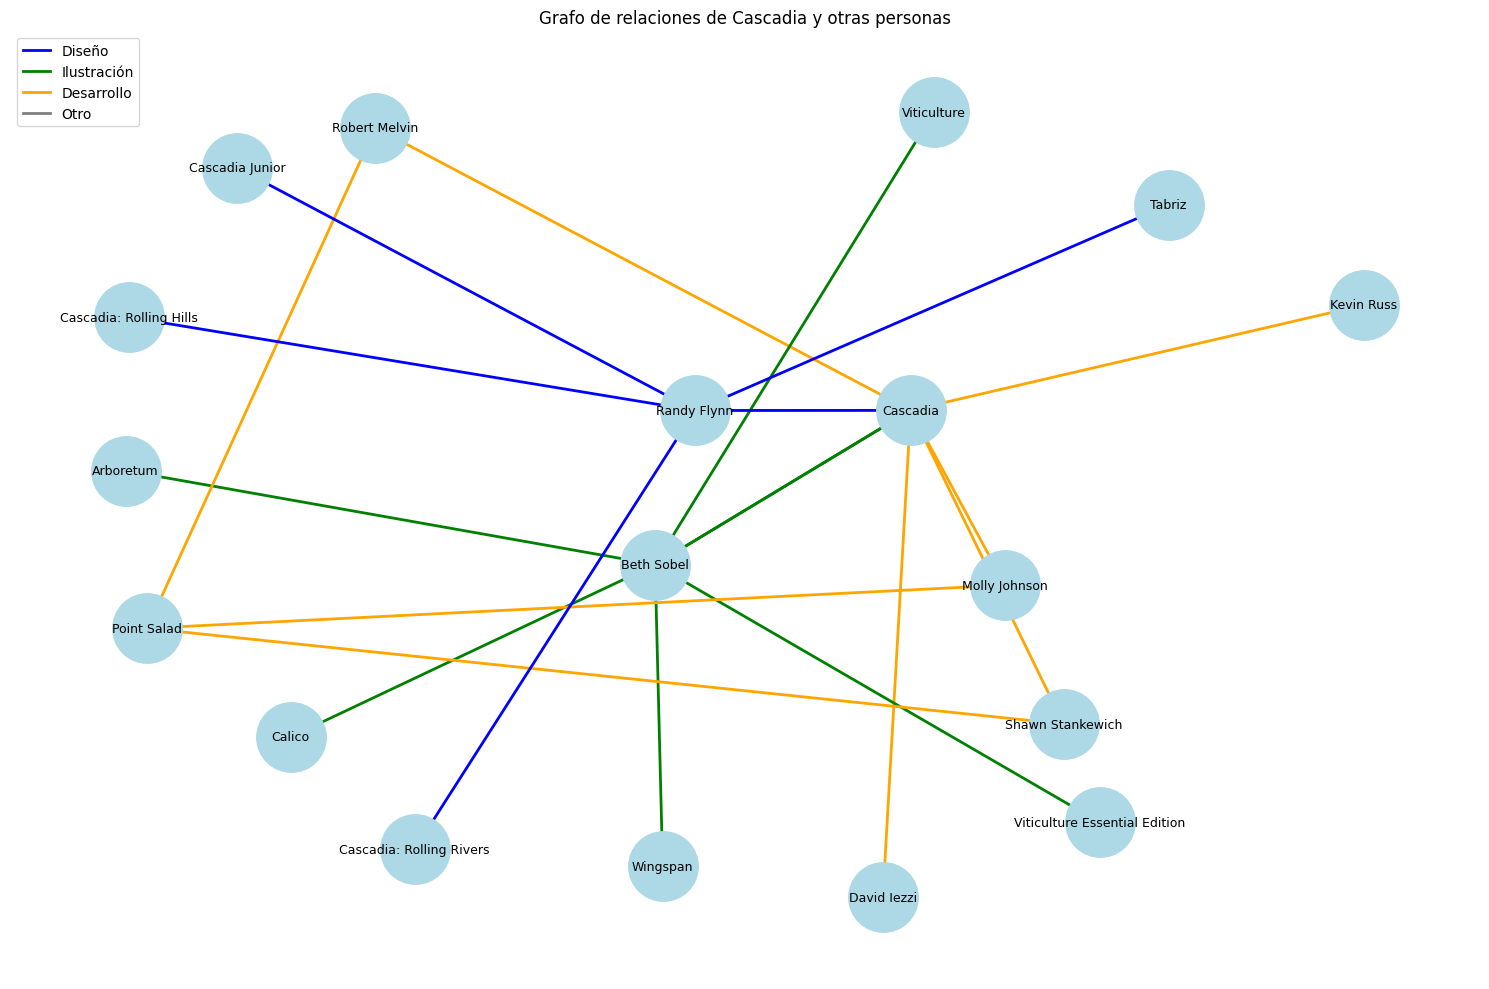

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
# Crear grafo dirigido
G = nx.DiGraph()

# Colores para cada tipo de relación
colores_relaciones = {
    "fue diseñado por": "blue",
    "diseñó": "blue",
    "fue ilustrado por": "green",
    "ilustró": "green",
    "fue desarrollado por": "orange",
    "desarrolló": "orange",
    # Agregar más si hace falta
}

# Agregar nodos y aristas
for _, row in df.iterrows():
    s1, rel, s2 = row["SUJETO1"], row["RELACION"], row["SUJETO2"]
    color = colores_relaciones.get(rel, "gray")
    G.add_edge(s1, s2, label=rel, color=color)
# Posicionamiento
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=1.5, seed=42)

# Dibujar nodos
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=2500)
nx.draw_networkx_labels(G, pos, font_size=9)

# Dibujar aristas por color
edges = G.edges(data=True)
for rel in set(colores_relaciones):
    edges_filtradas = [(u, v) for u, v, d in edges if d["label"] == rel]
    nx.draw_networkx_edges(G, pos, edgelist=edges_filtradas,
                           edge_color=colores_relaciones[rel], width=2)

# Agregar leyenda
legend_elements = [
    Line2D([0], [0], color='blue', lw=2, label='Diseño'),
    Line2D([0], [0], color='green', lw=2, label='Ilustración'),
    Line2D([0], [0], color='orange', lw=2, label='Desarrollo'),
    Line2D([0], [0], color='gray', lw=2, label='Otro')
]
plt.legend(handles=legend_elements, loc='upper left')
plt.title("Grafo de relaciones de Cascadia y otras personas")
plt.axis('off')
plt.tight_layout()
plt.show()


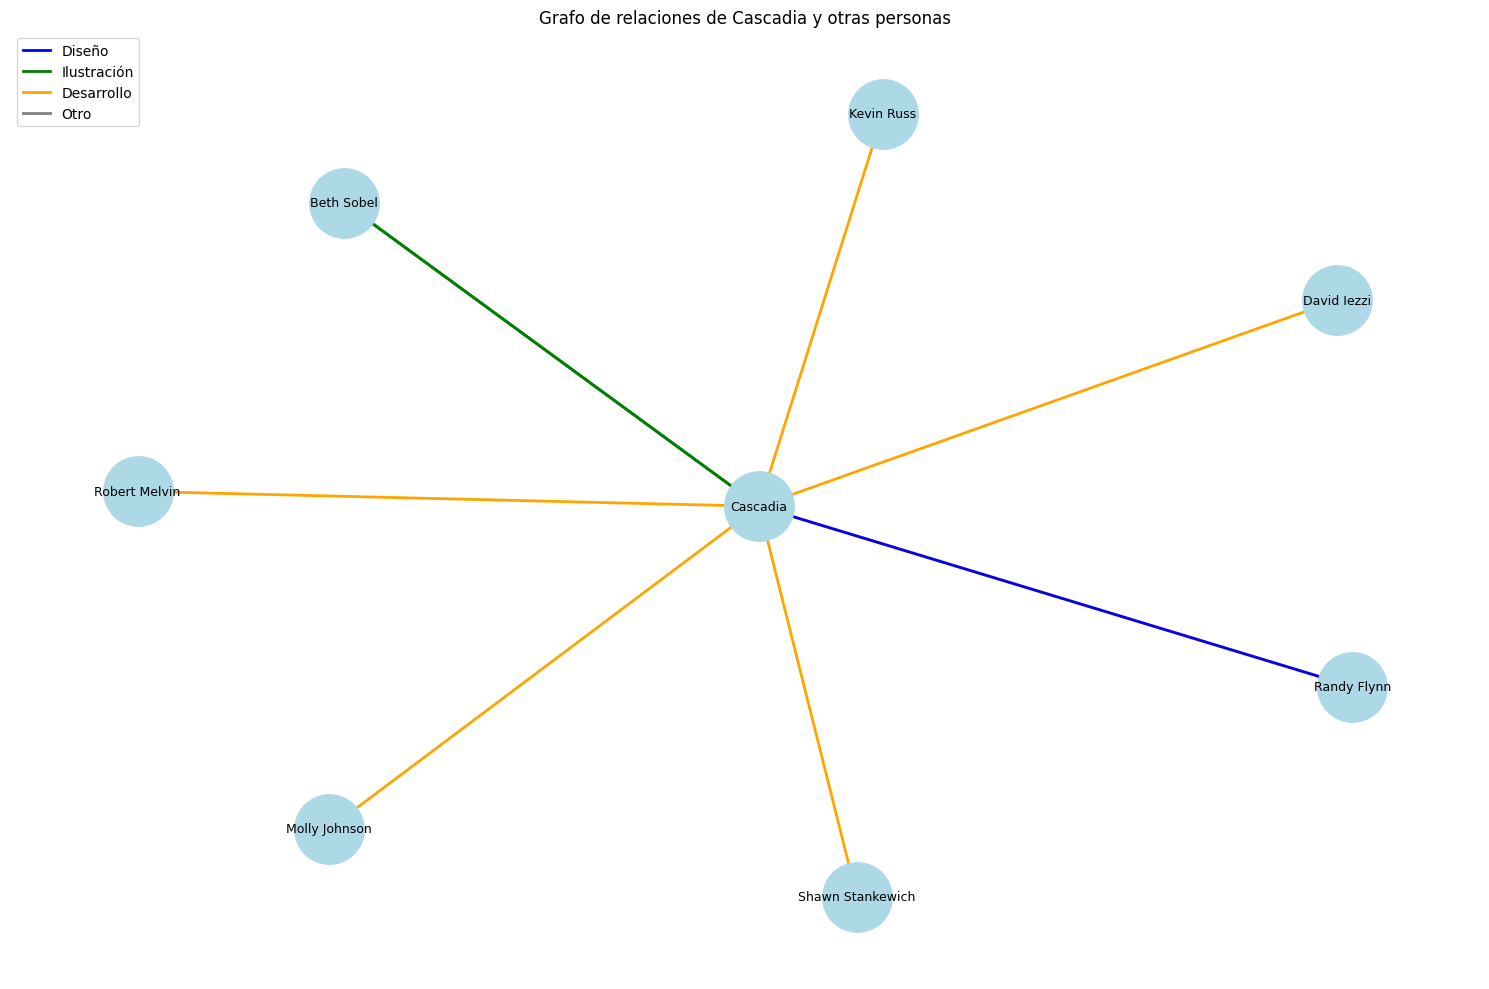

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
# Crear grafo dirigido
G = nx.DiGraph()

# Colores para cada tipo de relación
colores_relaciones = {
    "fue diseñado por": "blue",
    "diseñó": "blue",
    "fue ilustrado por": "green",
    "ilustró": "green",
    "fue desarrollado por": "orange",
    "desarrolló": "orange",
    # Agregar más si hace falta
}

# Agregar nodos y aristas
for _, row in df.iterrows():
    s1, rel, s2 = row["SUJETO1"], row["RELACION"], row["SUJETO2"]
    color = colores_relaciones.get(rel, "gray")
    G.add_edge(s1, s2, label=rel, color=color)
vecinos = set(nx.all_neighbors(G, "Cascadia"))
vecinos.add("Cascadia")
subgrafo = G.subgraph(vecinos)
# Posicionamiento
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(subgrafo, k=1.5, seed=42)

# Dibujar nodos
nx.draw_networkx_nodes(subgrafo, pos, node_color="lightblue", node_size=2500)
nx.draw_networkx_labels(subgrafo, pos, font_size=9)

# Dibujar aristas por color
edges = subgrafo.edges(data=True)
for rel in set(colores_relaciones):
    edges_filtradas = [(u, v) for u, v, d in edges if d["label"] == rel]
    nx.draw_networkx_edges(subgrafo, pos, edgelist=edges_filtradas,
                           edge_color=colores_relaciones[rel], width=2)

# Agregar leyenda
legend_elements = [
    Line2D([0], [0], color='blue', lw=2, label='Diseño'),
    Line2D([0], [0], color='green', lw=2, label='Ilustración'),
    Line2D([0], [0], color='orange', lw=2, label='Desarrollo'),
    Line2D([0], [0], color='gray', lw=2, label='Otro')
]
plt.legend(handles=legend_elements, loc='upper left')
plt.title("Grafo de relaciones de Cascadia con otras personas")
plt.axis('off')
plt.tight_layout()
plt.show()
